# Introduction to Linear Regression Using Python


 We will come to the formal definition later. Let us jump into a real problem.

# How many of you have visited the Yellowstone National Park?


![](images/US_Yellowstone.jpg)


![asd](images/whereisyellowstone.jpg)


![Image](images/YNP1.jpg)

![](images/YNP2.jpg)

![](images/YNP3.jpg)

![Yktocat](images/YNP4.jpg)

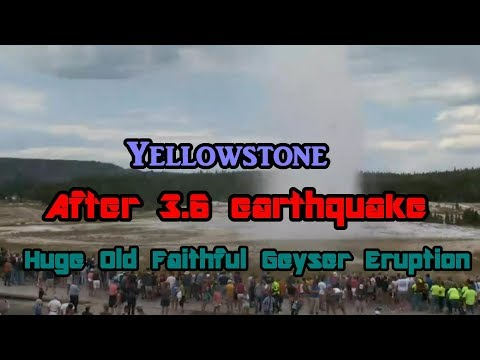

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('hAzETelnBz4')


![](images/YNP5.jpg) ![](images/YNP6.jpg)

# If you had some data, how can you predict the time of the next eruption?

## What data do you need?

List of data that could help

![](images/oldfaithful_dotplot.png)

Simple Linear Regression

y is "some function" of x

y = f(x)

y = m x + c

m is the slope
c is the intercept

# How to Perform a Linear Regression "fit" using Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# read data into a DataFrame
faithful_df = pd.read_csv('data/old_faithful.csv')
faithful_df.head()                

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


# Let's plot it and see what it looks 

(You should always try plotting your data to get a feel for it)

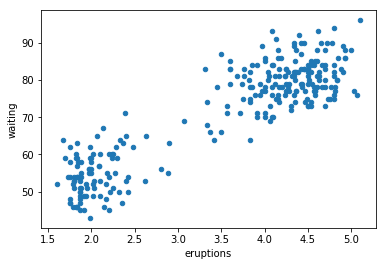

In [18]:
# first, plot the observed data
faithful_df.plot(x='eruptions', y='waiting', kind='scatter' )



## What can we say about the waiting times?

In [19]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
linear_mdl_wating = smf.ols(formula='waiting ~ eruptions', 
                            data=faithful_df).fit()

# print the coefficients
linear_mdl_wating.params

Intercept    33.474397
eruptions    10.729641
dtype: float64

In [20]:
linear_mdl_wating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                waiting   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 22 Sep 2017   Prob (F-statistic):          8.13e-100
Time:                        02:57:59   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.4744      1.155     28.985      0.000        31.201    35.748
eruptions     10.7296      0.315     34.089      0.000        10.110    11.349
==============================================================================
Omnibus:                        5.492   Durbin-Watson:                   2.543
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.683
Skew:                           0.237   Prob(JB):                       0.0962
Kurtosis:                       2.567   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting Model Coefficients

We can write the model as:

### waiting_time = 33.4 + 10.72 * eruption time

How do we interpret the waiting coefficient ($\beta_1$)?

A "unit" increase in eruptions time is associated with a 10.72 "unit" increase in waiting time.

An additional 1 minute of previous eruption means that you have to wait 10.72 minutes longer for the next one.



### Using the Model for Prediction

Let's say that there was an eruption that lasted **3 minutes **

What would we predict for the waiting time?


In [4]:
wait_time = 33.4 + 10.72 * 3
print("{} minutes".format(wait_time))

65.56 minutes


In [5]:
# What does the R^2 Look like?

print(linear_mdl_wating.rsquared)
print(linear_mdl_wating.rsquared_adj)

NameError: name 'linear_mdl_wating' is not defined

### Use the Model to make predictions

Statsmodel can be used to make predictions.

**Note** It expects the inputs to come as a data frame.



In [24]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_newdata = pd.DataFrame({'eruptions': [1,2,3,4]})
X_newdata.head()

,eruptions
0,1
1,2
2,3
3,4


In [25]:
linear_mdl_wating.predict(X_newdata)

array([ 44.20403842,  54.93367981,  65.66332121,  76.3929626 ])

### Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [26]:
# create a DataFrame with some values for eruptions...
X_newdata = pd.DataFrame({'eruptions': [1,2,3,4,5]})
X_newdata.head()

,eruptions
0,1
1,2
2,3
3,4
4,5


In [27]:
# make predictions for those x values and store them
preds = linear_mdl_wating.predict(X_newdata)
preds

array([ 44.20403842,  54.93367981,  65.66332121,  76.3929626 ,  87.122604  ])

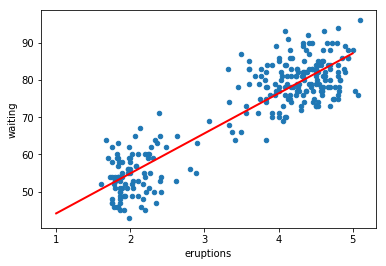

In [29]:
faithful_df.plot(kind='scatter', x='eruptions', y='waiting')

# then, plot the least squares line in red
plt.plot(X_newdata, preds, c='red', linewidth=2)

## Is this a good fit?